<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

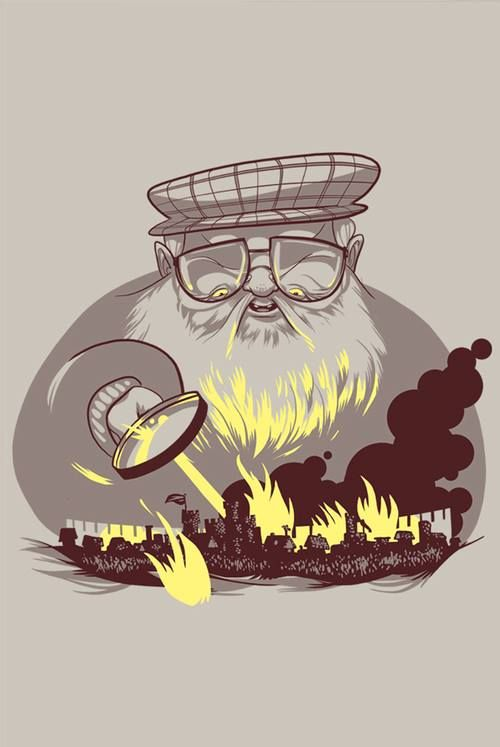

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [467]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 36.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 16.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [469]:
data = pd.read_csv("/content/game_of_thrones_train.csv",index_col=['S.No'])
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [471]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


<BarContainer object of 25 artists>

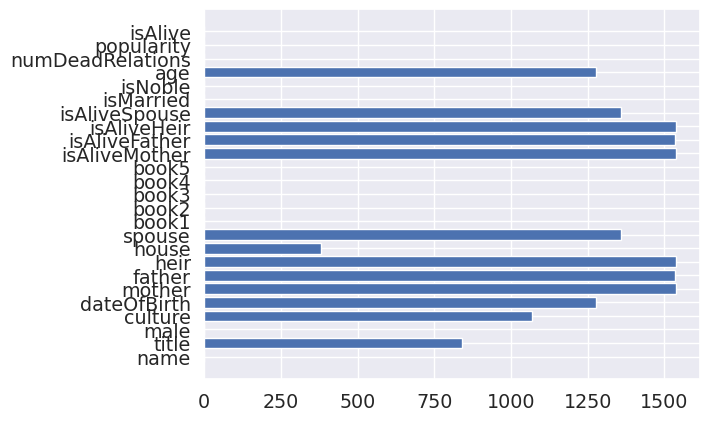

In [472]:
dat=data.isna().sum(axis=0)
plt.barh(dat.index, dat.values)

In [473]:
(data.isna().sum(axis=0)/len(data))>0.75

,0
name,False
title,False
male,False
culture,False
dateOfBirth,True
mother,True
father,True
heir,True
house,False
spouse,True


In [474]:
proz=((data.isna().sum(axis=0)/len(data))>0.75)
dat[proz==False]

,0
name,0
title,840
male,0
culture,1069
house,381
book1,0
book2,0
book3,0
book4,0
book5,0


In [475]:
data['house'].value_counts()

,count
house,
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
...,...
House Celtigar,1
House of Ghazeen,1
House Byrch,1


не сможем определить, какими значениями надо будет заменить - возможно, если поставим всем моду, то это сильно повлияет на ухудшение модели, поэтому "дом" удалю

In [476]:
data['title'].value_counts()

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetport Sound,1
Lord of Greyshield,1
Felwood,1


In [477]:
data['title'].mode()[0]

'Ser'

In [478]:
data['title'] = data['title'].fillna(data['title'].mode()[0])

In [479]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,Ser,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,Ser,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [480]:
data['culture'].value_counts()

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


In [481]:
data['culture'] = data['culture'].fillna(data['culture'].mode()[0])

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [482]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [483]:
data['isPopular']=np.where(data['popularity']>=0.5,1,0)

In [484]:
data['boolDeadRelations']=np.where(data['numDeadRelations']>=0,1,0)

In [485]:
replacement_dict = {value: key for key, values in cult.items() for value in values}
data['culture'] = data['culture'].str.lower().replace(replacement_dict)

In [486]:
data['culture'].value_counts()

,count
culture,
Northmen,1172
ironborn,92
Free Folk,56
Braavosi,40
valyrian,28
Dornish,21
Ghiscari,18
dothraki,17
Westermen,14


In [487]:
data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.0
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420,0.017341,1.0
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443,0.130581,0.0
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000,0.000000,1.0
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000,0.000000,1.0
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000,0.000000,1.0
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.0


In [488]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,NaN,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,NaN,0,0.267559,1,0,1
4,Aemma Arryn,Queen,0,Northmen,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.0,0,0.183946,0,0,1
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.0,0,0.043478,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0.160535,1,0,1
1554,Masha Heddle,Ser,0,Northmen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0.040134,0,0,1
1555,Matthos Seaworth,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,0,0,NaN,0,0.076923,0,0,1


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [489]:
proz=((data.isna().sum(axis=0)/len(data))>0.75)
dat[proz==True]

,0
dateOfBirth,1278
mother,1539
father,1535
heir,1536
spouse,1357
isAliveMother,1539
isAliveFather,1535
isAliveHeir,1536
isAliveSpouse,1357
age,1278


In [490]:
data.drop(columns=['dateOfBirth','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','age','house','popularity','name'], inplace = True)

In [491]:
data

,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,Ser,1,Northmen,0,0,0,0,0,0,0,11,0,1,1
2,Lord of the Crossing,1,rivermen,1,1,1,1,1,1,1,1,1,1,1
3,Ser,1,Northmen,0,0,0,1,0,0,1,0,1,0,1
4,Queen,0,Northmen,0,0,0,0,0,1,1,0,0,0,1
5,Greenstone,0,Dornish,0,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Northmen,1,0,1,1,0,0,1,0,1,0,1
1554,Ser,0,Northmen,1,1,0,0,0,0,0,0,0,0,1
1555,Ser,1,Northmen,0,1,1,1,1,0,0,0,0,0,1


In [492]:
data.drop(columns='numDeadRelations')

,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1,Ser,1,Northmen,0,0,0,0,0,0,0,0,1,1
2,Lord of the Crossing,1,rivermen,1,1,1,1,1,1,1,1,1,1
3,Ser,1,Northmen,0,0,0,1,0,0,1,1,0,1
4,Queen,0,Northmen,0,0,0,0,0,1,1,0,0,1
5,Greenstone,0,Dornish,0,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Northmen,1,0,1,1,0,0,1,1,0,1
1554,Ser,0,Northmen,1,1,0,0,0,0,0,0,0,1
1555,Ser,1,Northmen,0,1,1,1,1,0,0,0,0,1


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

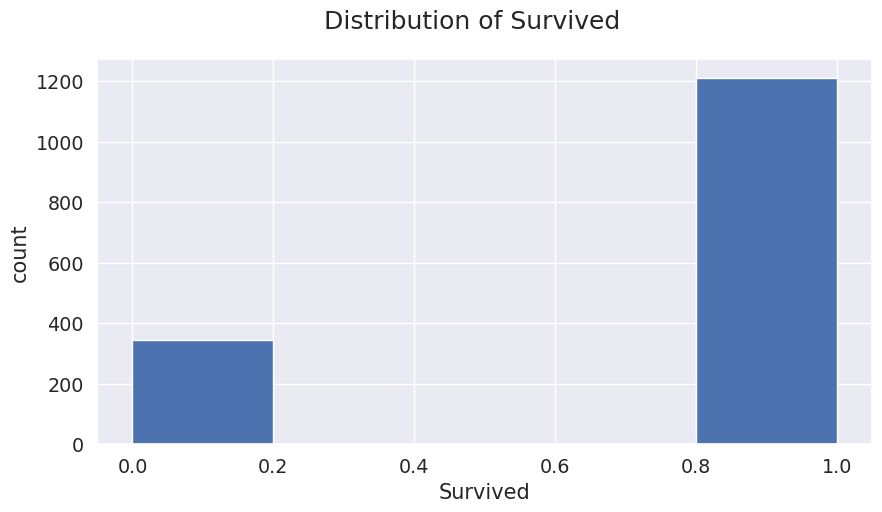

In [493]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=5)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()

наблюдаем сильный дисбаланс классов, буду использовать стратифайдшаффлсплит

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [494]:
categorical_columns =['title','culture']
categorical_features = data[categorical_columns]
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()



In [495]:
# one_hot = pd.get_dummies(data['title'])

# # concatenate the one-hot encoding with the original dataframe
# df_one_hot = pd.concat([data, one_hot], axis=1)

# # drop the original 'color' column
# df_one_hot = df_one_hot.drop('title', axis=1)

In [496]:
# one_hot = pd.get_dummies(df_one_hot['culture'])

# # concatenate the one-hot encoding with the original dataframe
# df_one_hot_1 = pd.concat([df_one_hot, one_hot], axis=1)

# # drop the original 'color' column
# df_one_hot_1 = df_one_hot_1.drop('Title', axis=1)

In [497]:
from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])

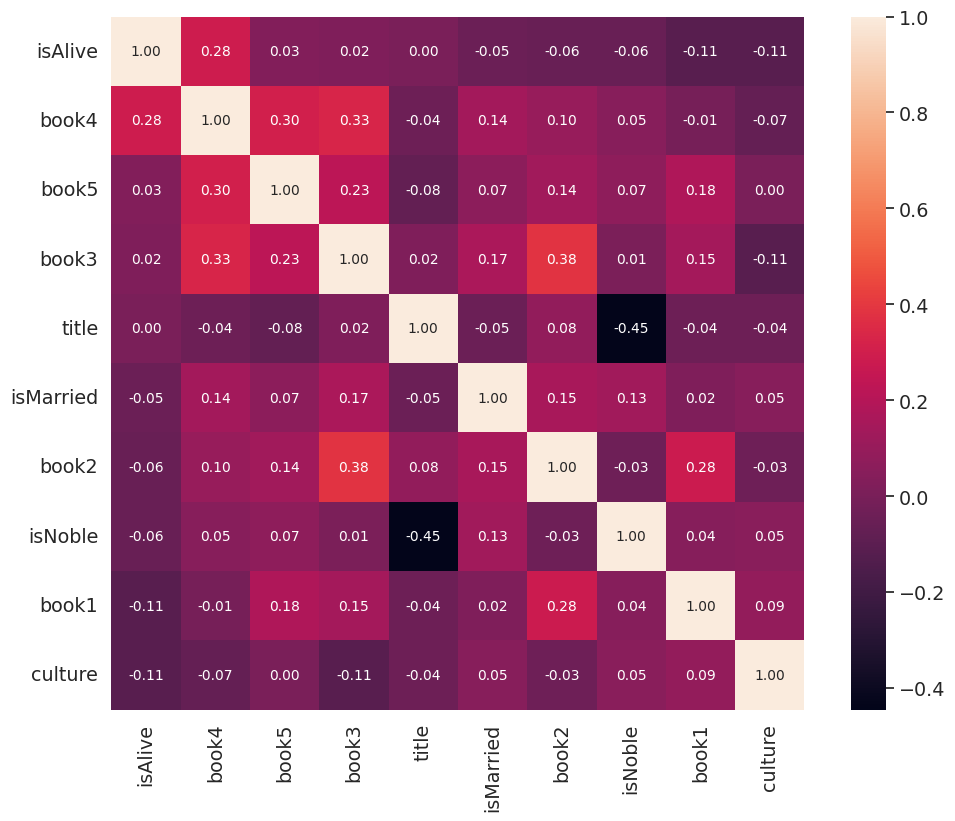

In [498]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [499]:
# data1 = data[data['Pclass'] == 1]['isAlive'].value_counts()
# data2 = df[df['Pclass'] == 2]['Survived'].value_counts()
# data3 = df[df['Pclass'] == 3]['Survived'].value_counts()

# # Строим круговую диаграмму
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,8))

# ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
# ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
# ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')

# ax1.set_title("Pclass = 1")
# ax2.set_title("Pclass = 2")
# ax3.set_title("Pclass = 3")

# plt.legend(['не выжил, выжил'])

# plt.show()

In [500]:
data=data.drop(columns='numDeadRelations')

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [501]:
X = data.drop(['isAlive'], axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [502]:
from sklearn.model_selection import train_test_split

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [504]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [505]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [506]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [507]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import StratifiedShuffleSplit

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [508]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


In [509]:
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2)
pipe = Pipeline([('preprocessing', MinMaxScaler()),
                 ('classifier', KNeighborsClassifier())])

n_neighbors=np.arange(1, 15)
p=[1, 2, 3]
weights=['uniform','distance']

param_grid =[
    {
    'preprocessing': [ MinMaxScaler(),StandardScaler()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]


grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1,scoring='accuracy')

grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
grid_result = pd.DataFrame(grid.cv_results_)
display(grid_result.sort_values(["rank_test_score",'std_test_score']).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier__n_neighbors': 9, 'classifier__p': 2, 'classifier__weights': 'uniform', 'preprocessing': StandardScaler()}

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.814458



,101,105,145,97,85,73,157,77,89,81,...,18,15,19,23,12,16,20,13,21,17
mean_fit_time,0.005752,0.011728,0.005669,0.00511,0.005153,0.005453,0.005207,0.005214,0.005371,0.007106,...,0.004893,0.005673,0.005223,0.005023,0.005396,0.00476,0.005411,0.005266,0.005209,0.005645
std_fit_time,0.00016,0.004973,0.000823,0.000127,0.000117,0.000917,0.000666,0.000621,0.000045,0.00367,...,0.000264,0.00085,0.000328,0.000138,0.000924,0.00012,0.001095,0.000192,0.000499,0.000649
mean_score_time,0.037143,0.176843,0.037297,0.037137,0.036787,0.039117,0.060549,0.03526,0.039581,0.161648,...,0.009256,0.01385,0.012328,0.08025,0.031236,0.027814,0.067168,0.035324,0.091329,0.032566
std_score_time,0.003345,0.032928,0.00145,0.002904,0.002437,0.000531,0.013082,0.002676,0.008373,0.041616,...,0.000095,0.000228,0.000068,0.007688,0.001563,0.001149,0.009464,0.000568,0.002877,0.000683
param_classifier__n_neighbors,9,9,13,9,8,7,14,7,8,7,...,2,2,2,2,2,2,2,2,2,2
param_classifier__p,2,3,1,1,1,1,1,2,2,3,...,2,1,2,3,1,2,3,1,3,2
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,distance,distance,distance,distance,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),StandardScaler()
params,"{'classifier__n_neighbors': 9, 'classifier__p'...","{'classifier__n_neighbors': 9, 'classifier__p'...","{'classifier__n_neighbors': 13, 'classifier__p...","{'classifier__n_neighbors': 9, 'classifier__p'...","{'classifier__n_neighbors': 8, 'classifier__p'...","{'classifier__n_neighbors': 7, 'classifier__p'...","{'classifier__n_neighbors': 14, 'classifier__p...","{'classifier__n_neighbors': 7, 'classifier__p'...","{'classifier__n_neighbors': 8, 'classifier__p'...","{'classifier__n_neighbors': 7, 'classifier__p'...",...,"{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'...","{'classifier__n_neighbors': 2, 'classifier__p'..."
split0_test_score,0.779116,0.7751,0.7751,0.783133,0.763052,0.767068,0.763052,0.763052,0.75502,0.767068,...,0.630522,0.626506,0.630522,0.630522,0.610442,0.606426,0.606426,0.594378,0.594378,0.586345


In [578]:
model = DecisionTreeClassifier()

# опишем сетку, по которой будем искать
param_grid = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': [1,2, 3,4,5,6,7,8,9,10,11],
    'splitter': ('best','random'),
    'criterion':["gini", "entropy", "log_loss"]
}

# создадим объект GridSearchCV
gridsearch = GridSearchCV(model, param_grid,cv=cv, refit=True, return_train_score=True, n_jobs=-1,scoring='accuracy')

# запустим поиск
gridsearch.fit(X_train, y_train)

# выведем наилучшие параметры
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(gridsearch.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(gridsearch.best_score_))
grid_result = pd.DataFrame(gridsearch.cv_results_)
display(grid_result.sort_values(["rank_test_score",'std_test_score']).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'criterion': 'log_loss', 'max_depth': 7, 'min_samples_leaf': 1, 'splitter': 'random'}

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.811245



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,529,89,287,485,289,489,88,124,308,506,...,557,157,556,179,379,181,380,578,575,178
mean_fit_time,0.002725,0.003766,0.005561,0.002306,0.004415,0.002286,0.006234,0.002828,0.009181,0.002595,...,0.002549,0.004611,0.002946,0.007514,0.002493,0.004191,0.003044,0.003642,0.002571,0.004958
std_fit_time,0.000629,0.002984,0.003898,0.000092,0.003303,0.000102,0.00311,0.000587,0.006516,0.00004,...,0.000055,0.004172,0.000116,0.003299,0.000037,0.002173,0.000127,0.001141,0.000058,0.003588
mean_score_time,0.001298,0.002945,0.00358,0.001354,0.004853,0.001528,0.001593,0.005131,0.003458,0.001315,...,0.001401,0.002824,0.001373,0.001559,0.001348,0.004022,0.001406,0.001372,0.001748,0.004912
std_score_time,0.000048,0.002782,0.004077,0.000077,0.004577,0.000214,0.000072,0.003204,0.00309,0.000062,...,0.000069,0.002968,0.00007,0.000129,0.000061,0.002883,0.000085,0.000067,0.000812,0.003106
param_criterion,log_loss,gini,entropy,log_loss,entropy,log_loss,gini,gini,entropy,log_loss,...,log_loss,gini,log_loss,gini,entropy,gini,entropy,log_loss,log_loss,gini
param_max_depth,7,5,5,5,5,5,5,6,6,6,...,8,8,8,9,9,9,9,9,9,9
param_min_samples_leaf,1,1,1,1,2,3,1,8,1,1,...,4,2,4,2,3,3,4,4,2,2
param_splitter,random,random,random,random,random,random,best,best,best,best,...,random,random,best,random,random,random,best,best,random,best
params,"{'criterion': 'log_loss', 'max_depth': 7, 'min...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...","{'criterion': 'entropy', 'max_depth': 5, 'min_...","{'criterion': 'log_loss', 'max_depth': 5, 'min...","{'criterion': 'entropy', 'max_depth': 5, 'min_...","{'criterion': 'log_loss', 'max_depth': 5, 'min...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...","{'criterion': 'gini', 'max_depth': 6, 'min_sam...","{'criterion': 'entropy', 'max_depth': 6, 'min_...","{'criterion': 'log_loss', 'max_depth': 6, 'min...",...,"{'criterion': 'log_loss', 'max_depth': 8, 'min...","{'criterion': 'gini', 'max_depth': 8, 'min_sam...","{'criterion': 'log_loss', 'max_depth': 8, 'min...","{'criterion': 'gini', 'max_depth': 9, 'min_sam...","{'criterion': 'entropy', 'max_depth': 9, 'min_...","{'criterion': 'gini', 'max_depth': 9, 'min_sam...","{'criterion': 'entropy', 'max_depth': 9, 'min_...","{'criterion': 'log_loss', 'max_depth': 9, 'min...","{'criterion': 'log_loss', 'max_depth': 9, 'min...","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
split0_test_score,0.807229,0.811245,0.811245,0.811245,0.811245,0.811245,0.811245,0.803213,0.803213,0.803213,...,0.787149,0.783133,0.787149,0.767068,0.779116,0.771084,0.783133,0.783133,0.7751,0.799197


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [584]:
model = Pipeline([('classifier', DecisionTreeClassifier(max_depth=7,min_samples_leaf=7,splitter='best',criterion='log_loss'))])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


In [585]:
model = Pipeline([('preprocessing', StandardScaler()),
                 ('classifier', KNeighborsClassifier(n_neighbors=9,p=2,weights='uniform',n_jobs=-1))])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7660


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [513]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 1.08MB/s]


In [514]:
test_yy=pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
test_yy

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [515]:
test_yy['isPopular']=np.where(test_yy['popularity']>=0.5,1,0)

In [516]:
test_yy['boolDeadRelations']=np.where(test_yy['numDeadRelations']>=0,1,0)

In [517]:
test_yy['culture'] = test_yy['culture'].str.lower().replace(replacement_dict)

In [518]:
test_yy.drop(columns=['dateOfBirth','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','age','house','popularity','name','numDeadRelations'], inplace = True)

In [519]:
# # Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  test_yy[column] = label_encoding.fit_transform(test_yy[column])

In [520]:
test_yy

,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,
1558,109,0,36,0,0,0,0,1,0,0,0,1
1559,109,0,0,0,1,1,1,1,0,0,1,1
1560,109,0,36,0,0,1,1,0,0,0,0,1
1561,94,1,36,1,1,1,1,1,0,1,0,1
1562,109,1,29,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1942,109,1,14,1,1,1,1,1,0,0,0,1
1943,109,1,36,0,1,0,1,1,0,0,0,1
1944,109,1,36,1,1,1,1,1,0,0,0,1


In [579]:
model = Pipeline([('classifier', DecisionTreeClassifier(max_depth=7,min_samples_leaf=7,splitter='best',criterion='log_loss'))])
model.fit(X,y)
y_pred=model.predict(test_yy)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy : %.4f" % accuracy)

In [580]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [581]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [582]:
submission['isAlive']=y_pred
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [583]:
submission.to_csv("/content/new_submission.csv", index=False)

Итог: метрика 0.7